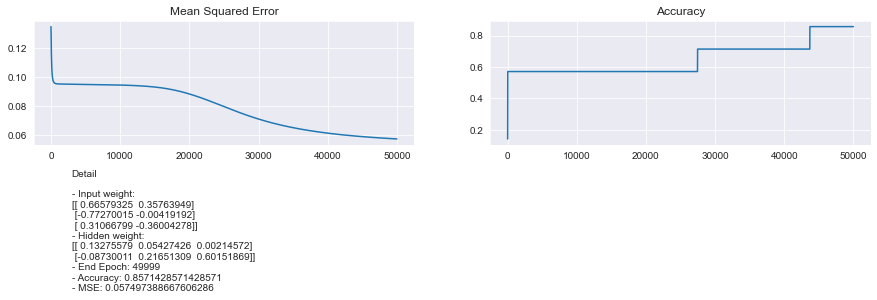

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

df = pd.read_csv("data.csv")
df.head()

# Data got from Normalisasi Output
y = pd.get_dummies(df.NormalisasiOutput).values

# Data got from Normalisasi A, Normalisasi B, Normalisasi C
x = df.drop([
    "No", "KABUPATENKOTA", "2019", "2020", "2021", "2022", "Selisih20192020A", "Selisih20202021B", "Selisih20212022C",
    "Output", "NormalisasiOutput"
], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=2)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels) ** 2).sum() / (2 * N)
    return mse


def accuracy(predictions, labels):
    predicions_correct = np.argmax(predictions, axis=1) == np.argmax(labels, axis=1)
    accuracy = np.mean(predicions_correct)
    return accuracy


learning_rate = 0.5
epochs = 50000
N = y_train.size

# Input got from x data
n_input = 3
# Hidden is optional
n_hidden = 2
# Output got from y data
n_output = 3

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))
weghts_i_to_h = weights_1
# print(weights_1, '\n')
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))
weghts_h_to_o = weights_2
# print(weights_2, '\n')

monitoring = {"mean_squared_error": [], "accuracy": []}

for epoch in range(epochs):
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)

    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)

    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)

    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

    n_epoch = epoch


monitoring_df = pd.DataFrame(monitoring)

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
axes[1, 0].axis('off')
axes[1, 1].axis('off')
axes[1, 0].annotate('Detail\n\n- Input weight: \n%s\n- Hidden weight: \n%s\n- End Epoch: %s \n- Accuracy: %s \n- MSE: %s'
                    % (weghts_i_to_h, weghts_h_to_o, n_epoch, acc, mse), (0.1, 0.5), xycoords='axes fraction',
                    va='center')
monitoring_df.mean_squared_error.plot(ax=axes[0, 0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[0, 1], title="Accuracy")

plt.show()

